# Task1 - LGM VIP - Neural Network to read handwriting
### In this task we design a neural network which can identify the correct number written by human.It is basically a classification problem where we classify which digit  is it between [0-9]. We use MNIST dataset.
### We are using keras which is a higher level API in tensorflow for this purpose. 

Step1: Importing the essential libraries to set up keras

In [32]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

Step2: Load the MNIST dataset. We make a split of train and test set with 60k samples in training and 10K samples in test

In [33]:
(mnist_train_images, mnist_train_labels),(mnist_test_images, mnist_test_labels) = mnist.load_data()

In [34]:
train = mnist_train_images.reshape(60000,784)
test = mnist_test_images.reshape(10000,784)


We also convert the input to the format which keras accepts. As the input is pixel values the value range is between [0-255].We change it to between [0-1]


In [35]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

Next we do the conversion of labels/ dependent variable to one hot encoding vectors. This will help us in the classification process by converting the numbers/digits to an encoded vector

In [36]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

Step 3: Visualizing the dataset. We use matplotlib to just see how the dataset looks like.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


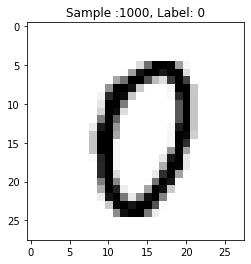

In [37]:
import matplotlib.pyplot as plt
def display(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    image = train[num].reshape([28,28])
    plt.title('Sample :%d, Label: %d' % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display(1000)

Step 4: Building Sequential Model in neural network

In [39]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))


In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Step 5: Model Optimization

In [41]:
model.compile(loss = 'categorical_crossentropy',optimizer = RMSprop(),metrics = ['accuracy'])

Step 6: Fitting the training data to the model

In [42]:
history = model.fit(train,train_labels,batch_size = 100,epochs = 10, verbose = 2,validation_data = (test,test_labels))

Epoch 1/10
600/600 - 7s - loss: 0.2335 - accuracy: 0.9286 - val_loss: 0.0988 - val_accuracy: 0.9691
Epoch 2/10
600/600 - 7s - loss: 0.1025 - accuracy: 0.9693 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 3/10
600/600 - 7s - loss: 0.0764 - accuracy: 0.9772 - val_loss: 0.0810 - val_accuracy: 0.9778
Epoch 4/10
600/600 - 7s - loss: 0.0653 - accuracy: 0.9811 - val_loss: 0.0710 - val_accuracy: 0.9805
Epoch 5/10
600/600 - 7s - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0765 - val_accuracy: 0.9812
Epoch 6/10
600/600 - 8s - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0806 - val_accuracy: 0.9801
Epoch 7/10
600/600 - 8s - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0788 - val_accuracy: 0.9839
Epoch 8/10
600/600 - 8s - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.0938 - val_accuracy: 0.9816
Epoch 9/10
600/600 - 8s - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.0854 - val_accuracy: 0.9818
Epoch 10/10
600/600 - 7s - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.1022 - val_accuracy: 0.9825

Step 7: Model Evaluation

In [43]:
score = model.evaluate(test,test_labels,verbose = 0)
print("Test loss",score[0])
print("Test accuracy",score[1])


Test loss 0.10215340554714203
Test accuracy 0.9825000166893005


Finding which numbers have been wrongly predicted. 

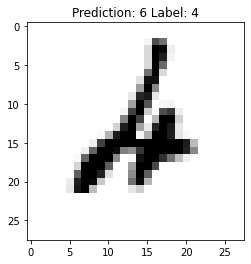

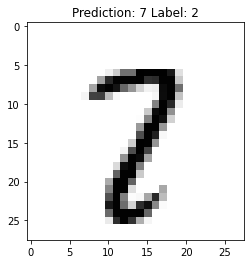

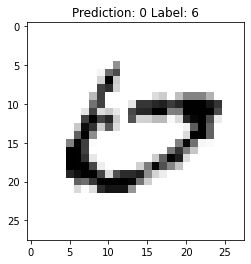

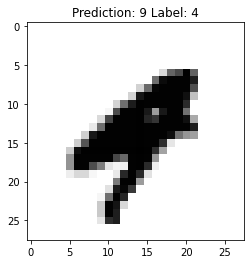

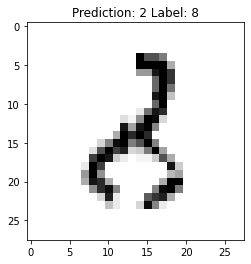

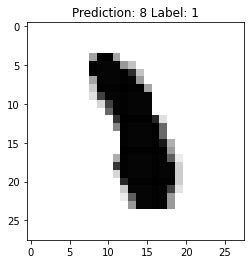

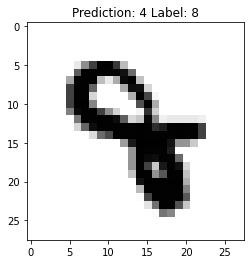

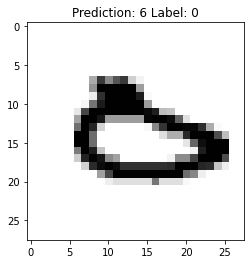

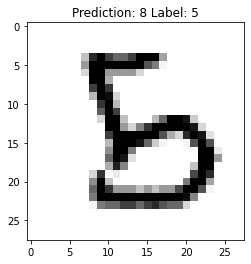

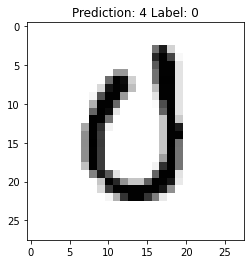

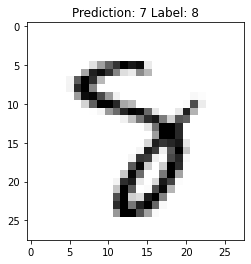

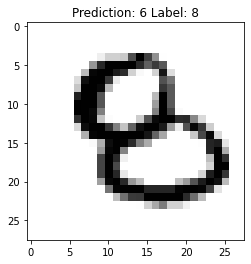

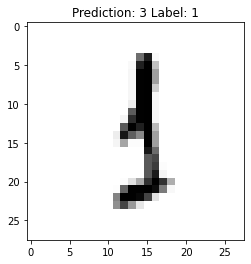

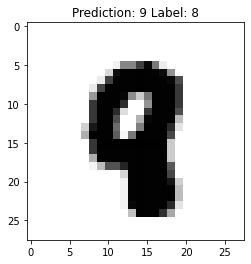

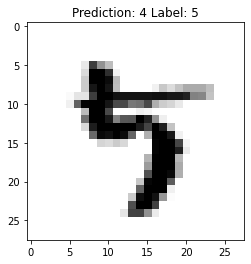

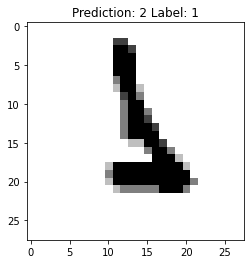

In [44]:
for x in range(1000):
    test_image = test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()